In [1]:
import sympy as sp

In [2]:
import sympy.physics.units.quantities as sq

In [3]:
from sympy.physics.quantum.constants import hbar

In [4]:
from custom_libraries.stepper import *

In [5]:
from custom_libraries.schrodinger import *

In [6]:
from custom_libraries.utilities import *

In [7]:
def real_harmonics( _ ):
    assumptions = standard_harmonic_assumptions( _ );
    assumptions.update( { 'real' : True } )
    return assumptions

In [8]:
stairwell_solver = TimeIndependentSchrodingerConstantPotentials1D( 
        StairWell.default_non_uniform_length_potential_table(), 
        tuple( StairWell.default_non_uniform_length_potential_table().keys() )[ -1 ], 
        make_psis = make_psi_numbered, 
        harmonics_assumptions = real_harmonics, 
        repeating = False, 
        as_distances = True, 
        #as_distances = False, 
        #normalization_conjugate_not_squared_absolute_value = False
    )

In [9]:
stairwell_solver.impose_zero_conditions_to_ends()

(('BoundryZeroConditions', {\psi_{0}(0): 0, \psi_{2}(L_2): 0}),
 ('BoundryZeroConditions', {\psi_{0}(0): 0, \psi_{2}(L_2): 0}))

In [10]:
display_steps( stairwell_solver.equations )

Eq(-k_0**2*\psi_{0}(x) + Derivative(\psi_{0}(x), (x, 2)), 0)

Eq(-k_1**2*\psi_{1}(x) + Derivative(\psi_{1}(x), (x, 2)), 0)

Eq(-k_2**2*\psi_{2}(x) + Derivative(\psi_{2}(x), (x, 2)), 0)

In [11]:
display_in( stairwell_solver.harmonic_constants )

Eq(k_0, sqrt(2)*sqrt(m)*sqrt(-E + V_0)/hbar)

Eq(k_1, sqrt(2)*sqrt(m)*sqrt(-E + V_1)/hbar)

Eq(k_2, sqrt(2)*sqrt(m)*sqrt(-E + V_2)/hbar)

In [12]:
stairwell_solver.boundries.boundries

{'ContinuityConditions': {\psi_{0}(L_0): \psi_{1}(0),
  \psi_{1}(L_1): \psi_{2}(0)},
 'BoundryZeroConditions': {\psi_{0}(0): 0, \psi_{2}(L_2): 0}}

In [13]:
stairwell_solver.boundries.ContinuityConditions

{\psi_{0}(L_0): \psi_{1}(0), \psi_{1}(L_1): \psi_{2}(0)}

In [14]:
stairwell_solver.boundries.BoundryZeroConditions

{\psi_{0}(0): 0, \psi_{2}(L_2): 0}

In [15]:
stairwell_solver.boundries.update_all_boundry_conditions()

('LastUpdatedAllBoundryConditions',
 {\psi_{0}(L_0): \psi_{1}(0),
  \psi_{1}(L_1): \psi_{2}(0),
  \psi_{0}(0): 0,
  \psi_{2}(L_2): 0})

In [16]:
stairwell_solver.boundries.display()

'ContinuityConditions'

Eq(\psi_{0}(L_0), \psi_{1}(0))

Eq(\psi_{1}(L_1), \psi_{2}(0))

'BoundryZeroConditions'

Eq(\psi_{0}(0), 0)

Eq(\psi_{2}(L_2), 0)

'LastUpdatedAllBoundryConditions'

Eq(\psi_{0}(L_0), \psi_{1}(0))

Eq(\psi_{1}(L_1), \psi_{2}(0))

Eq(\psi_{0}(0), 0)

Eq(\psi_{2}(L_2), 0)

In [17]:
stairwell_solver

In [18]:
solutions = stairwell_solver.solve_odes()

In [19]:
display_in( solutions )

Eq(\psi_{0}(x), \psi_{1}(0)*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - \psi_{1}(0)*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (\psi_{0}(L_0)*exp(2*L_1*k_1) - \psi_{2}(0)*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1) + (-\psi_{0}(L_0) + \psi_{2}(0)*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1))

Eq(\psi_{2}(x), \psi_{1}(L_1)*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - \psi_{1}(L_1)*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [20]:
stairwell_solver.substitute_wave_functions_into_normalizations()

In [21]:
stairwell_solver.boundries_in_expression_to_constants()

([<custom_libraries.stepper.Stepper at 0x7fca6d0511f0>,
 {'Before': [['TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105'],
   ['TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105']],
  'Post': [['TimeIndependentSchrodingerConstantPotentials1DCheckPointPostBoundryToConstantSubstitution112',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointPostBoundryToConstantSubstitution112',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointPostBoundryToConstantSubstitution112'],
   ['TimeI

In [22]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), B_{0}*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - B_{0}*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (-B_{0} + B_{1}*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1))

Eq(\psi_{2}(x), B_{1}*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - B_{1}*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [23]:
display_steps( stairwell_solver.normalizations )

Eq(Integral((B_{0}*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - B_{0}*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))*(exp(L_0*k_0)*exp(k_0*x)*conjugate(B_{0})/(exp(2*L_0*k_0) - 1) - exp(L_0*k_0)*exp(-k_0*x)*conjugate(B_{0})/(exp(2*L_0*k_0) - 1)), (x, 0, L_0)), N_0)

Eq(Integral(((-B_{0} + B_{1}*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1))*((exp(L_1*k_1)*conjugate(B_{1}) - conjugate(B_{0}))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (exp(2*L_1*k_1)*conjugate(B_{0}) - exp(L_1*k_1)*conjugate(B_{1}))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1)), (x, 0, L_1)), N_1)

Eq(Integral((B_{1}*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - B_{1}*exp(k_2*x)/(exp(2*L_2*k_2) - 1))*(exp(2*L_2*k_2)*exp(-k_2*x)*conjugate(B_{1})/(exp(2*L_2*k_2) - 1) - exp(k_2*x)*conjugate(B_{1})/(exp(2*L_2*k_2) - 1)), (x, 0, L_2)), N_2)

In [24]:
q_constants = []
for normalization in stairwell_solver.normalizations: 
    result, constants = group_constants( normalization.last_step(), [ stairwell_solver.position ] + stairwell_solver.boundry_constant_symbols, 'Q' )
    q_constants.append( constants )
    normalization.add_step( result )

In [25]:
display_steps( stairwell_solver.normalizations )

Eq(Integral((B_{0}*Q_{3}*exp(Q_{2}*x) - B_{0}*Q_{3}*exp(-Q_{2}*x))*(Q_{3}*exp(Q_{2}*x)*conjugate(B_{0}) - Q_{3}*exp(-Q_{2}*x)*conjugate(B_{0})), (x, 0, L_0)), N_0)

Eq(Integral((Q_{4}*(-B_{0} + B_{1}*Q_{2})*exp(Q_{3}*x) + Q_{4}*(B_{0}*Q_{6} - B_{1}*Q_{2})*exp(-Q_{3}*x))*(Q_{4}*(-Q_{2}*conjugate(B_{1}) + Q_{6}*conjugate(B_{0}))*exp(-Q_{3}*x) + Q_{4}*(Q_{2}*conjugate(B_{1}) - conjugate(B_{0}))*exp(Q_{3}*x)), (x, 0, L_1)), N_1)

Eq(Integral((-B_{1}*Q_{2}*exp(Q_{1}*x) + B_{1}*Q_{4}*exp(-Q_{1}*x))*(-Q_{2}*exp(Q_{1}*x)*conjugate(B_{1}) + Q_{4}*exp(-Q_{1}*x)*conjugate(B_{1})), (x, 0, L_2)), N_2)

In [26]:
display_table = lambda table : [ ( display( key ), display_steps( table[ key ] ) ) for key in table ]

In [27]:
auto_solved = {}
auto_solved[ 0 ] = stairwell_solver.solve_boundry_constants_from_equation( stairwell_solver.normalizations[ 0 ] )

Has  B_{0}
Solutions:  [Piecewise((-sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True)), Piecewise((sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))]


B_{0}

I have sols!


Piecewise((-sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

Piecewise((sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

Solved for  B_{0}


In [28]:
display_table( auto_solved[ 0 ] )

B_{0}

Piecewise((-sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

Piecewise((sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

[(None, None)]

In [29]:
auto_solved[ 1 ] = stairwell_solver.solve_boundry_constants_from_equation( stairwell_solver.normalizations[ 1 ] )

Has  B_{0}
Solutions:  [Piecewise(((B_{1}*Q_{2}*Q_{4}*(2*L_1*Q_{3}*Q_{6}*exp(2*L_1*Q_{3}) + 2*L_1*Q_{3}*exp(2*L_1*Q_{3}) - Q_{6}*exp(2*L_1*Q_{3}) + Q_{6} - exp(4*L_1*Q_{3}) + exp(2*L_1*Q_{3})) + sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_1*Q_{3}*exp(4*L_1*Q_{3}) - 2*N_1*Q_{3}*exp(2*L_1*Q_{3}))*exp(L_1

B_{0}

I have sols!


Piecewise(((B_{1}*Q_{2}*Q_{4}*(2*L_1*Q_{3}*Q_{6}*exp(2*L_1*Q_{3}) + 2*L_1*Q_{3}*exp(2*L_1*Q_{3}) - Q_{6}*exp(2*L_1*Q_{3}) + Q_{6} - exp(4*L_1*Q_{3}) + exp(2*L_1*Q_{3})) + sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_1*Q_{3}*exp(4*L_1*Q_{3}) - 2*N_1*Q_{3}*exp(2*L_1*Q_{3}))*exp(L_1*Q_{3}))/(Q_{4}*(4*L_1*Q

Piecewise(((2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*exp(2*L_1*Q_{3}) - B_{1}*Q_{2}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*Q_{6} - B_{1}*Q_{2}*Q_{4}*exp(4*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*exp(2*L_1*Q_{3}) - sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_

Piecewise((-sqrt(N_1/(L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1))), Eq(Q_{3}, 0)), (nan, True))

Piecewise((sqrt(N_1/(L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1))), Eq(Q_{3}, 0)), (nan, True))

Solved for  B_{0}


In [30]:
display_table( auto_solved[ 1 ] )

B_{0}

Piecewise((-sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

Piecewise((sqrt(2)*sqrt(-N_0*Q_{2}/(Q_{3}**2*(4*L_0*Q_{2}*exp(2*L_0*Q_{2}) - exp(4*L_0*Q_{2}) + 1)))*exp(L_0*Q_{2}), Ne(Q_{2}, 0)), (nan, True))

Piecewise(((B_{1}*Q_{2}*Q_{4}*(2*L_1*Q_{3}*Q_{6}*exp(2*L_1*Q_{3}) + 2*L_1*Q_{3}*exp(2*L_1*Q_{3}) - Q_{6}*exp(2*L_1*Q_{3}) + Q_{6} - exp(4*L_1*Q_{3}) + exp(2*L_1*Q_{3})) + sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_1*Q_{3}*exp(4*L_1*Q_{3}) - 2*N_1*Q_{3}*exp(2*L_1*Q_{3}))*exp(L_1*Q_{3}))/(Q_{4}*(4*L_1*Q

Piecewise(((2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*exp(2*L_1*Q_{3}) - B_{1}*Q_{2}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*Q_{6} - B_{1}*Q_{2}*Q_{4}*exp(4*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*exp(2*L_1*Q_{3}) - sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_

Piecewise((-sqrt(N_1/(L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1))), Eq(Q_{3}, 0)), (nan, True))

Piecewise((sqrt(N_1/(L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1))), Eq(Q_{3}, 0)), (nan, True))

[(None, None)]

In [31]:
def clean_nan_piecewise( nan_piecewise ): 
    if type( nan_piecewise.args[ 1 ][ 0 ] ) is sp.core.numbers.NaN: 
        return nan_piecewise.args[ 0 ][ 0 ]

In [32]:
sol_1_positive = clean_nan_piecewise( list( auto_solved[ 1 ].values() )[ 0 ][ 2 ].last_step() )

In [33]:
sol_1_negative = clean_nan_piecewise( list( auto_solved[ 1 ].values() )[ 0 ][ 3 ].last_step() )

In [34]:
sol_1_positive

(B_{1}*Q_{2}*Q_{4}*(2*L_1*Q_{3}*Q_{6}*exp(2*L_1*Q_{3}) + 2*L_1*Q_{3}*exp(2*L_1*Q_{3}) - Q_{6}*exp(2*L_1*Q_{3}) + Q_{6} - exp(4*L_1*Q_{3}) + exp(2*L_1*Q_{3})) + sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_1*Q_{3}*exp(4*L_1*Q_{3}) - 2*N_1*Q_{3}*exp(2*L_1*Q_{3}))*exp(L_1*Q_{3}))/(Q_{4}*(4*L_1*Q_{3}*Q_{6}*

In [35]:
sol_1_negative

(2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}*L_1*Q_{2}*Q_{3}*Q_{4}*exp(2*L_1*Q_{3}) - B_{1}*Q_{2}*Q_{4}*Q_{6}*exp(2*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*Q_{6} - B_{1}*Q_{2}*Q_{4}*exp(4*L_1*Q_{3}) + B_{1}*Q_{2}*Q_{4}*exp(2*L_1*Q_{3}) - sqrt(4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - 8*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 4*B_{1}**2*L_1**2*Q_{2}**2*Q_{3}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}**2 + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(4*L_1*Q_{3}) - 4*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*Q_{6} - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + 2*B_{1}**2*Q_{2}**2*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2 - 8*L_1*N_1*Q_{3}**2*Q_{6}*exp(2*L_1*Q_{3}) + 2*N_1*Q_{3}*Q_{6}**2*exp(2*L_1*Q_{3}) - 2*N_1*Q_{3}*Q_{6}**2 + 2*N_1*Q_{3}*exp

In [36]:
b_0_norm_with_b_1 = sp.Eq( sp.Abs( stairwell_solver.boundry_constant_symbols[ 0 ]  )** 2, ( sol_1_positive * sol_1_negative ).simplify() )

In [37]:
b_0_norm_with_b_1

Eq(Abs(B_{0})**2, (4*B_{1}**2*L_1*Q_{2}**2*Q_{3}*Q_{4}**2*exp(2*L_1*Q_{3}) - B_{1}**2*Q_{2}**2*Q_{4}**2*exp(4*L_1*Q_{3}) + B_{1}**2*Q_{2}**2*Q_{4}**2 + 2*N_1*Q_{3}*exp(2*L_1*Q_{3}))/(Q_{4}**2*(4*L_1*Q_{3}*Q_{6}*exp(2*L_1*Q_{3}) - Q_{6}**2*exp(2*L_1*Q_{3}) + Q_{6}**2 - exp(4*L_1*Q_{3}) + exp(2*L_1*Q_{3}))))

In [38]:
reverse_table = lambda table : { table[ key ] : key for key in table }

In [39]:
q_1 = reverse_table( q_constants[ 1 ] )
b_0_norm_with_b_1 = b_0_norm_with_b_1.xreplace( q_1 )
# Need to do it twice, some Q constants are replaced by other Q constants.
b_0_norm_with_b_1 = b_0_norm_with_b_1.xreplace( q_1 )

In [40]:
b_0_norm_with_b_1

Eq(Abs(B_{0})**2, (exp(2*L_1*k_1) - 1)**2*(4*B_{1}**2*L_1*k_1*exp(4*L_1*k_1)/(exp(2*L_1*k_1) - 1)**2 - B_{1}**2*exp(6*L_1*k_1)/(exp(2*L_1*k_1) - 1)**2 + B_{1}**2*exp(2*L_1*k_1)/(exp(2*L_1*k_1) - 1)**2 + 2*N_1*k_1*exp(2*L_1*k_1))/(4*L_1*k_1*exp(4*L_1*k_1) - exp(6*L_1*k_1) + exp(2*L_1*k_1)))

In [41]:
#auto_solved[ 2 ] = stairwell_solver.solve_boundry_constants_from_equation( stairwell_solver.normalizations[ 2 ] )

In [42]:
#display_table( auto_solved[ 2 ] )

In [43]:
def square( solutions ): 
    solutions_ = list( solutions.values() )[ 0 ]
    return sp.Eq( sp.Abs( list( solutions.keys() )[ 0 ] ) ** 2, 
            solutions_[ 0 ].last_step().args[ 0 ].args[ 0 ] \
            * solutions_[ 1 ].last_step().args[ 0 ].args[ 0 ] 
        )

In [44]:
q_0 = reverse_table( q_constants[ 0 ] )
b_0 = square( auto_solved[ 0 ] )
b_0 = b_0.xreplace( q_0 )
b_0 = b_0.xreplace( q_0 )

In [45]:
b_0

Eq(Abs(B_{0})**2, 2*N_0*k_0*(exp(2*L_0*k_0) - 1)**2/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))

In [46]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), B_{0}*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - B_{0}*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (-B_{0} + B_{1}*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1))

Eq(\psi_{2}(x), B_{1}*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - B_{1}*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [47]:
sp.core.relational.Equality

sympy.core.relational.Equality

In [48]:
( wave_function_substitutions, normalization_substitutions ) = stairwell_solver.make_substitution_solution( 0 )

<class 'sympy.logic.boolalg.BooleanTrue'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>


In [49]:
for equation in wave_function_substitutions: 
    display( equation )

Eq(B_{0}, (-B_{0} + B_{1}*exp(L_1*k_1))/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))/(exp(2*L_1*k_1) - 1))

Eq(B_{1}, B_{1}*exp(2*L_2*k_2)/(exp(2*L_2*k_2) - 1) - B_{1}/(exp(2*L_2*k_2) - 1))

In [50]:
for equation in normalization_substitutions: 
    display( equation.simplify() )

Eq(N_0, Piecewise((B_{0}*Q_{3}**2*(-4*L_0*Q_{2}*exp(2*L_0*Q_{2}) + exp(4*L_0*Q_{2}) - 1)*exp(-2*L_0*Q_{2})*conjugate(B_{0})/(2*Q_{2}), Ne(B_{2}, Q_{2})), (0, True)))

Eq(N_1, Piecewise((Q_{4}**2*(2*L_1*Q_{3}*(B_{0}*Q_{2}*Q_{6}*conjugate(B_{1}) + B_{0}*Q_{2}*conjugate(B_{1}) - 2*B_{0}*Q_{6}*conjugate(B_{0}) - 2*B_{1}*Q_{2}**2*conjugate(B_{1}) + B_{1}*Q_{2}*Q_{6}*conjugate(B_{0}) + B_{1}*Q_{2}*conjugate(B_{0}))*exp(2*L_1*Q_{3}) - (1 - exp(2*L_1*Q_{3}))*(-B_{0}*Q_{2}*conjugate(B_{1}) + B_{0}*conjugate(B_{0}) + B_{1}*Q_{2}**2*conjugate(B_{1}) - B_{1}*Q_{2}*conjugate(B_{0}))*exp(2*L_1*Q_{3}) - (1 - exp(2*L_1*Q_{3}))*(-B_{0}*Q_{2}*Q_{6}*conjugate(B_{1}) + B_{0}*Q_{6}**2*conjugate(B_{0}) + B_{1}*Q_{2}**2*conjugate(B_{1}) - B_{1}*Q_{2}*Q_{6}*conjugate(B_{0})))*exp(-2*L_1*Q_{3})/(2*Q_{3}), Ne(B_{2}, Q_{3})), (B_{0}*L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1)*conjugate(B_{0}), True)))

Eq(N_2, Integral((-B_{1}*Q_{2}*exp(Q_{1}*x) + B_{1}*Q_{4}*exp(-Q_{1}*x))*(-Q_{2}*exp(Q_{1}*x)*conjugate(B_{1}) + Q_{4}*exp(-Q_{1}*x)*conjugate(B_{1})), (x, B_{2}, L_2)))

In [51]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), B_{0}*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - B_{0}*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (-B_{0} + B_{1}*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1))

Eq(\psi_{2}(x), B_{1}*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - B_{1}*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [52]:
( wave_function_region_substitutions, normalization_region_substitutions ) = stairwell_solver.make_substitution_solution()

<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.core.relational.Equality'>
<class 'sympy.logic.boolalg.BooleanTrue'>
<class 'sympy.core.relational.Equality'>


In [53]:
for equation in wave_function_region_substitutions: 
    display( equation )

Eq(B_{0}, B_{0}*exp(2*L_0*k_0)/(exp(2*L_0*k_0) - 1) - B_{0}/(exp(2*L_0*k_0) - 1))

Eq(B_{1}, (-B_{0} + B_{1}*exp(L_1*k_1))*exp(L_1*k_1)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-L_1*k_1)/(exp(2*L_1*k_1) - 1))

In [54]:
for equation in normalization_region_substitutions: 
    display( equation.simplify() )

Eq(N_0, Piecewise((B_{0}*Q_{3}**2*(-4*L_0*Q_{2}*exp(2*L_0*Q_{2}) + exp(4*L_0*Q_{2}) - 1)*exp(-2*L_0*Q_{2})*conjugate(B_{0})/(2*Q_{2}), Ne(B_{2}, Q_{2})), (0, True)))

Eq(N_1, Piecewise((Q_{4}**2*(2*L_1*Q_{3}*(B_{0}*Q_{2}*Q_{6}*conjugate(B_{1}) + B_{0}*Q_{2}*conjugate(B_{1}) - 2*B_{0}*Q_{6}*conjugate(B_{0}) - 2*B_{1}*Q_{2}**2*conjugate(B_{1}) + B_{1}*Q_{2}*Q_{6}*conjugate(B_{0}) + B_{1}*Q_{2}*conjugate(B_{0}))*exp(2*L_1*Q_{3}) - (1 - exp(2*L_1*Q_{3}))*(-B_{0}*Q_{2}*conjugate(B_{1}) + B_{0}*conjugate(B_{0}) + B_{1}*Q_{2}**2*conjugate(B_{1}) - B_{1}*Q_{2}*conjugate(B_{0}))*exp(2*L_1*Q_{3}) - (1 - exp(2*L_1*Q_{3}))*(-B_{0}*Q_{2}*Q_{6}*conjugate(B_{1}) + B_{0}*Q_{6}**2*conjugate(B_{0}) + B_{1}*Q_{2}**2*conjugate(B_{1}) - B_{1}*Q_{2}*Q_{6}*conjugate(B_{0})))*exp(-2*L_1*Q_{3})/(2*Q_{3}), Ne(B_{2}, Q_{3})), (B_{0}*L_1*Q_{4}**2*(Q_{6}**2 - 2*Q_{6} + 1)*conjugate(B_{0}), True)))

Eq(N_2, Integral((-B_{1}*Q_{2}*exp(Q_{1}*x) + B_{1}*Q_{4}*exp(-Q_{1}*x))*(-Q_{2}*exp(Q_{1}*x)*conjugate(B_{1}) + Q_{4}*exp(-Q_{1}*x)*conjugate(B_{1})), (x, B_{2}, L_2)))

In [55]:
#b_0_norm_with_b_1 = sp.Eq( stairwell_solver.boundry_constant_symbols[ 0 ] ** 2, b_0_norm_with_b_1.rhs )

In [56]:
#b_0_norm_with_b_1

In [57]:
#solutions = sp.solve( [ b_0_norm_with_b_1 ] + wave_function_region_substitutions + wave_function_substitutions, stairwell_solver.boundry_constant_symbols )

In [58]:
#solutions

In [59]:
b_1_in_terms_of_b_0 = sp.solve( b_0_norm_with_b_1, stairwell_solver.boundry_constant_symbols[ 1 ] )

In [60]:
b_1 = ( b_1_in_terms_of_b_0[ 0 ] * b_1_in_terms_of_b_0[ 1 ].simplify() ).subs( { b_0.lhs : b_0.rhs } )

In [61]:
b_1

-(8*L_1*N_0*k_0*k_1*(exp(2*L_0*k_0) - 1)**2*exp(2*L_1*k_1)/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1) - 2*N_0*k_0*(exp(2*L_0*k_0) - 1)**2*exp(4*L_1*k_1)/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1) + 2*N_0*k_0*(exp(2*L_0*k_0) - 1)**2/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1) - 2*N_1*k_1*exp(4*L_1*k_1) + 4*N_1*k_1*exp(2*L_1*k_1) - 2*N_1*k_1)/(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1)

In [62]:
b_1_simple = b_1.simplify()

In [63]:
b_1_simple

2*(-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(-exp(4*L_1*k_1) + 2*exp(2*L_1*k_1) - 1))/((4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1))

In [64]:
b_1_equation = sp.Eq( sp.Abs( stairwell_solver.boundry_constant_symbols[ 1 ] ) ** 2, b_1_simple )

In [65]:
substitution_table = {
        stairwell_solver.boundry_constant_symbols[ 0 ] : sp.sqrt( b_0.rhs ), 
        stairwell_solver.boundry_constant_symbols[ 1 ] : sp.sqrt( b_1_equation.rhs ) 
    }

In [66]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), B_{0}*exp(L_0*k_0)*exp(k_0*x)/(exp(2*L_0*k_0) - 1) - B_{0}*exp(L_0*k_0)*exp(-k_0*x)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (-B_{0} + B_{1}*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (B_{0}*exp(2*L_1*k_1) - B_{1}*exp(L_1*k_1))*exp(-k_1*x)/(exp(2*L_1*k_1) - 1))

Eq(\psi_{2}(x), B_{1}*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - B_{1}*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [67]:
for equation in stairwell_solver.equations: 
    equation.operate( lambda step : step.subs( substitution_table ) )

In [68]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(L_0*k_0)*exp(k_0*x)*Abs(exp(2*L_0*k_0) - 1)/(exp(2*L_0*k_0) - 1) - sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(L_0*k_0)*exp(-k_0*x)*Abs(exp(2*L_0*k_0) - 1)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), (-sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*Abs(exp(2*L_0*k_0) - 1) + sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(-exp(4*L_1*k_1) + 2*exp(2*L_1*k_1) - 1))/((4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1)))*exp(L_1*k_1))*exp(k_1*x)/(exp(2*L_1*k_1) - 1) + (sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*exp(2*L_1*k_1)*Abs(exp(2*L_0*k_0) - 1) - sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(-exp(4*L_1*k_1) + 2*exp(2*L_1*k_1) - 1))/((4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1)))*exp(L_1*k_1))*exp(

Eq(\psi_{2}(x), sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(-exp(4*L_1*k_1) + 2*exp(2*L_1*k_1) - 1))/((4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1)))*exp(2*L_2*k_2)*exp(-k_2*x)/(exp(2*L_2*k_2) - 1) - sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 - N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(-exp(4*L_1*k_1) + 2*exp(2*L_1*k_1) - 1))/((4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(4*L_1*k_1*exp(2*L_1*k_1) - exp(4*L_1*k_1) + 1)))*exp(k_2*x)/(exp(2*L_2*k_2) - 1))

In [69]:
for equation in stairwell_solver.equations: 
    equation.manipulate( lambda side : side.simplify() )

In [70]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), -sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*(exp(L_0*k_0) - exp(k_0*(L_0 + 2*x)))*exp(-k_0*x)*Abs(exp(2*L_0*k_0) - 1)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), -sqrt(2)*(-(sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*exp(L_1*k_1) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*Abs(exp(2*L_0*k_0) - 1))*exp(2*k_1*x) + (sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) +

Eq(\psi_{2}(x), sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*(-(1 - exp(2*L_2*k_2))*exp(2*L_2*k_2) + (1 - exp(2*L_2*k_2))*exp(2*k_2*x))*exp(-k_2*x)/(1 - exp(2*L_2*k_2))**2)

In [91]:
lengths = ( 1.0 / 3.0, 2.0 / 3.0, 1.0 )

In [92]:
probabilities = ( .2, .3, .5 )

In [93]:
potentials = ( 1.0, 2.0 / 3.0, 1.0 / 3.0 )

In [94]:
energy = potentials[ - 1 ] # Keep it real

In [95]:
mass = 1.0

In [76]:
plancks_constant = 1.0

In [77]:
#for ii in range( len( stairwell_solver.equations ) ): 
#    k = ( sp.sqrt( mass ) * sp.sqrt( 2 ) * ( -energy + potentials[ ii ] ) ) / plancks_constant
#    stairwell_solver.equations[ ii ] \
#            .operate( lambda step : step.xreplace( { stairwell_solver.harmonic_constants[ ii ].lhs : k } ), chain = True ) \
#            .operate( lambda step : step.xreplace( { stairwell_solver.normalization_symbols[ ii ] : probabilities[ ii ] } ), chain = True ) \
#            .operate( lambda step : step.xreplace( { stairwell_solver.regions()[ ii ] : lengths[ ii ] } ), chain = True )


In [78]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), -sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*(exp(L_0*k_0) - exp(k_0*(L_0 + 2*x)))*exp(-k_0*x)*Abs(exp(2*L_0*k_0) - 1)/(exp(2*L_0*k_0) - 1))

Eq(\psi_{1}(x), -sqrt(2)*(-(sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*exp(L_1*k_1) - sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*Abs(exp(2*L_0*k_0) - 1))*exp(2*k_1*x) + (sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) +

Eq(\psi_{2}(x), sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*(-(1 - exp(2*L_2*k_2))*exp(2*L_2*k_2) + (1 - exp(2*L_2*k_2))*exp(2*k_2*x))*exp(-k_2*x)/(1 - exp(2*L_2*k_2))**2)

In [79]:
stairwell_solver.equations[ 2 ].last_step()

Eq(\psi_{2}(x), sqrt(2)*sqrt((-4*L_1*N_0*k_0*k_1*(1 - exp(2*L_0*k_0))**2*exp(2*L_1*k_1) + N_0*k_0*(1 - exp(2*L_0*k_0))**2*exp(4*L_1*k_1) - N_0*k_0*(1 - exp(2*L_0*k_0))**2 + N_1*k_1*(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1)*(exp(4*L_1*k_1) - 2*exp(2*L_1*k_1) + 1))/(16*L_0*L_1*k_0*k_1*exp(2*L_0*k_0 + 2*L_1*k_1) + 4*L_0*k_0*exp(2*L_0*k_0) - 4*L_0*k_0*exp(2*L_0*k_0 + 4*L_1*k_1) + 4*L_1*k_1*exp(2*L_1*k_1) - 4*L_1*k_1*exp(4*L_0*k_0 + 2*L_1*k_1) - exp(4*L_0*k_0) - exp(4*L_1*k_1) + exp(4*L_0*k_0 + 4*L_1*k_1) + 1))*(-(1 - exp(2*L_2*k_2))*exp(2*L_2*k_2) + (1 - exp(2*L_2*k_2))*exp(2*k_2*x))*exp(-k_2*x)/(1 - exp(2*L_2*k_2))**2)

In [80]:
# executable_wave_functions = [ sp.lambdify( [ stairwell_solver.position ], equation.last_step() ) for equation in stairwell_solver.equations ]

In [160]:
harmonic_constant_symbols = \
        [ stairwell_solver.harmonic_constants[ ii ].lhs for ii in range( len( stairwell_solver.equations ) ) ]
executable_wave_function = sp.lambdify(  
        [ stairwell_solver.position, stairwell_solver.mass, stairwell_solver.total_energy, ] + \
        harmonic_constant_symbols + [
        *tuple( stairwell_solver.normalization_symbols ), 
        *tuple( stairwell_solver.regions() )
    ], ( stairwell_solver.equations[ 0 ].last_step().rhs ** 2 ).simplify(), "numpy" )

In [161]:
import numpy as np

In [162]:
harmonic_constants = tuple( [ ( np.sqrt( mass ) * np.sqrt( 2 ) * ( -energy + potential ) ) / plancks_constant \
        for potential in potentials ] )
x_range = np.arange( 0, lengths[ 0 ], .001 )


In [163]:
data = []
for x in x_range: 
    data.append( executable_wave_function( x, mass, energy, *harmonic_constants, *probabilities, *lengths ) )

In [164]:
executable_wave_function

<function _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2)>

In [168]:
import matplotlib.pyplot as plt

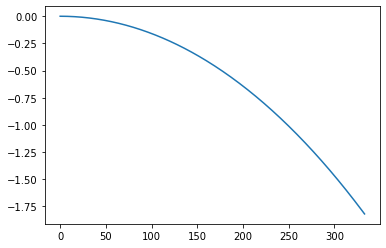

In [169]:
plt.plot( data )

In [165]:
data

[-0.0,
 -1.5883293333631094e-05,
 -6.353322980846599e-05,
 -0.0001429499788465514,
 -0.0002541338228186427,
 -0.0003970851570451776,
 -0.0005718044897977338,
 -0.0007782924423007546,
 -0.0010165497487338968,
 -0.001286577256234466,
 -0.0015883759249005563,
 -0.0019219468277944156,
 -0.0022872911509463066,
 -0.0026844101933585977,
 -0.0031133053670105598,
 -0.0035739781968632083,
 -0.004066430320864955,
 -0.004590663489957154,
 -0.005146679568080513,
 -0.005734480532181697,
 -0.006354068472220322,
 -0.007005445591176304,
 -0.007688614205057943,
 -0.008403576742909896,
 -0.009150335746821918,
 -0.009928893871937933,
 -0.010739253886465447,
 -0.011581418671685316,
 -0.012455391221962197,
 -0.013361174644754838,
 -0.014298772160627625,
 -0.015268187103261463,
 -0.016269422919466144,
 -0.01730248316919233,
 -0.018367371525544105,
 -0.019464091774792344,
 -0.020592647816387973,
 -0.02175304366297593,
 -0.02294528344040931,
 -0.024169371387764198,
 -0.025425311857354433,
 -0.02671310931474753

In [144]:
executable_wave_function( 0, mass, energy, *harmonic_constants, *probabilities, *lengths )

nan

In [118]:
import inspect


In [119]:
inspect.getsource( executable_wave_function )

'def _lambdifygenerated(x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2):\n    return -sqrt(2)*sqrt(N_0*k_0/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1))*(exp(L_0*k_0) - exp(k_0*(L_0 + 2*x)))*exp(-k_0*x)*abs(exp(2*L_0*k_0) - 1)/(exp(2*L_0*k_0) - 1)\n'

In [127]:
def psi_0( x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2 ):
    return -np.sqrt( 2 ) * np.sqrt( N_0 * k_0 / ( 4 * L_0 * k_0 * np.exp( 2 * L_0 * k_0 ) \
            - np.exp( 4 * L_0 * k_0 ) + 1 ) ) * ( np.exp( L_0 * k_0 ) - np.exp( k_0 * ( L_0 + 2 * x ) ) ) \
            * np.exp( -k_0 * x ) * np.abs( np.exp( 2 * L_0 * k_0 ) - 1 ) / ( np.exp( 2 * L_0 * k_0 ) - 1 )

In [ ]:
psi_0( 0, mass, energy, *harmonic_constants, *probabilities, *lengths )

In [146]:
def test( x, m, E, k_0, k_1, k_2, N_0, N_1, N_2, L_0, L_1, L_2 ):
    return -np.sqrt( 2 ) * np.sqrt( N_0 * k_0 / ( 4 * L_0 * k_0 * np.exp( 2 * L_0 * k_0 ) - np.exp( 4 * L_0 * k_0 ) + 1 ) )

In [147]:
test( 0, mass, energy, *harmonic_constants, *probabilities, *lengths )

/tmp/ipykernel_66/4044925764.py:2: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt( 2 ) * np.sqrt( N_0 * k_0 / ( 4 * L_0 * k_0 * np.exp( 2 * L_0 * k_0 ) - np.exp( 4 * L_0 * k_0 ) + 1 ) )


nan

In [145]:
np.exp( 2 * lengths[ 0 ] * harmonic_constants[ 0 ] )

1.8748700700626462

In [134]:
-np.sqrt( 2 )

-1.4142135623730951

In [135]:
2 * lengths[ 0 ] * harmonic_constants[ 0 ]

0.444444444444444*sqrt(2)

ERROR! Session/line number was not unique in database. History logging moved to new session 18


In [151]:
a = ( 4 * lengths[ 0 ] * harmonic_constants[ 0 ] * np.exp( 2 * lengths[ 0 ] * harmonic_constants[ 0 ] ) - np.exp( 4 * lengths[ 0 ] * harmonic_constants[ 0 ] ) + 1 )

In [152]:
a

-0.15827850782116526

In [153]:
b = probabilities[ 0 ] * harmonic_constants[ 0 ]

In [154]:
b

0.18856180831641273

In [155]:
a/b

-0.8393985464732544

In [156]:
np.sqrt( a/b)

/tmp/ipykernel_66/3875616573.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt( a/b)


nan